In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Course Recommender System

## Data Prep

This notebook serves as a basic explanation behind the reco-engine.
Here we demonstrates the basic algorithm with a very small subset of the UCD course data.

In [2]:
df = pd.read_csv("./data/demo_data.csv", sep=",")
df

,code,name,description,prereq
0,ECS 120,Theory of Computation,Fundamental ideas in the theory of computation...,"""(ECS 020 or MAT 108); (ECS 32B or ECS 36C Re..."
1,ECS 122A,Algorithm Design & Analysis,Complexity of algorithms bounds on complexity ...,ECS 020; (ECS 060 or ECS 032B or ECS 036C)
2,ECS 154,Computer Architecture,Introduction to digital design. Interfacing of...,ECS 050 or EEC 070
3,ECS 132,Probability & Statistical Modeling for Compute...,Univariate and multivariate distributions. Est...,(ECS 040 or ECS 034 or ECS 036B); ECS 020; MAT...
4,MAT 135A,Probability (4 units),Probability space; discrete probability combin...,MAT 021C; (MAT 108 or MAT 067)
5,STA 131A,Introduction to Probability Theory,Fundamental concepts of probability theory dis...,MAT 021C C- or better; (MAT 022A C- or better ...
6,ECS 122B,Algorithm Design & Analysis,Theory and practice of hard problems and probl...,ECS 122A; (ECS 060 or ECS 034 or ECS 036C).


## Similarity Matrix

After loading the course data, we calculate a similarity matrix based on the verbal description.
For simplicity, we will use cosine similarity here.
Further improvement could be done using advanced NLP embedding technics and/or similarity norm function.

In [3]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["description"])
cosine_sim = cosine_similarity(count_matrix)

visualize the similarity matrix of course descriptions.

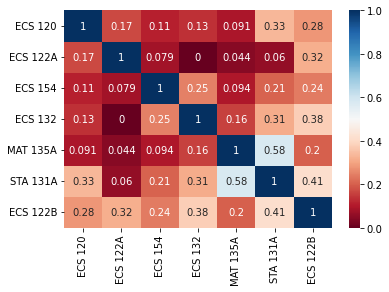

In [4]:
ax = sns.heatmap(
    cosine_sim,
    cmap='RdBu',
    vmin=0, vmax=1,
    annot=True,
    xticklabels=df['code'], yticklabels=df['code']
)
plt.show()


## Making Recommendations

Then we make the recommendation based on one of the user's liked course in the past and the similarity between it and other courses.

In [5]:
liked_course = "MAT 135A"
course_index = df[df.code == liked_course].index.values[0]
course_index

4

Find out a list of courses, sort them based on the similarity score from high to low.

In [6]:
similar_courses = list(enumerate(cosine_sim[course_index]))
sorted_similar_courses = sorted(similar_courses, key=lambda x:x[1], reverse=True)
sorted_similar_courses

[(4, 1.0),
 (5, 0.5788077248559672),
 (6, 0.2007387671367415),
 (3, 0.15975241260567344),
 (2, 0.09422229518055114),
 (0, 0.09095085938862486),
 (1, 0.04351941398892446)]

In [7]:
idx = [i for i, _ in sorted_similar_courses]
course_list = df.iloc[idx]["code"]
course_list

4    MAT 135A
5    STA 131A
6    ECS 122B
3     ECS 132
2     ECS 154
0     ECS 120
1    ECS 122A
Name: code, dtype: object

Choose then top `k` course from the above list, which will be our recommendations!

In [8]:
k = 3
course_list[1:1+k]

5    STA 131A
6    ECS 122B
3     ECS 132
Name: code, dtype: object